<a href="https://colab.research.google.com/github/ctruciosm/ACA124/blob/main/Problema_Arvore_Exp_Min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O Problema da Árvore de Expansão Mínima
## By Prof. Carlos Trucios

## Introdução

Considere uma rede conectada com $n$ nós em que todos os arcos foram eliminados. 


![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/MST.png)


> Lembrando: uma **árvore** é uma rede conectada (ou seja, existe uma cadeia conectando cada par de nós) que não contem ciclos (uma cadeia conectando um nó com ele mesmo). 



Uma **árvore** pode ser construida adicionando-se um arco por vez em uma certa direção. O primeiro arco pode ir para qualquer lugar para conectar algum par de nós. A partir daí, cada arco novo deve estar entre um nó que já esteja conectado a outros nós e um novo nó não previamente conectado a qualquer nó. Isto garante que o número de nós conectados seja igual ao número de arcos +1 e ao mesmo tempo impede a criação de ciclos na rede.




Assim que o $(n-1)-$éssimo arco for adicionado, o processo para, pois a árvore resultante conecta todos os $n$ nós. Esta árvore é chamada **árvore de expansão** (_i.e._ uma rede conectada de todos os $n$ nós que não contem ciclos).


A maneira de exemplo, veja que apenas um dos casos abaixo é uma árvore de expansão


![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/MST2.png)







## O problema da árvore de expansão mínima

Imagine agora um problema em que:

- São fornecidos os nós de uma rede mas **não** as ligações.
- São fornecidas as **potenciais ligações**, bem como o comprimento (distância, custo, tempo) para cada uma delas.
- Desejamos desenhar a rede inserindo ligações suficientes para satisfazer à necessidade de que haja um caminho entre cada par de nós.
- O objetivo é satisfazer essa necessidade de maneira a minimizar o comprimento total das ligações inseridas na rede.



## Algoritmo

1. Selecione qualquer nó arbitrariamente e depois o conecte (isto é, acrescente uma ligação) ao nó distinto mais próximo.
2. Identifique o nó sem conexão que esteja mais próximo a um nó conectado e, em seguida, conecte esses dois nós (isto é, acrescente uma ligação entre eles).
3. Repita o passo 2 até que todos os nós tenham sido conectados.

> Em caso de empates pode se escolher a ligação de forma arbitrária.

## Caso de estudo

Na Figura abaixo, cada nó representa um posto e as (possíveis) ligações representam vias nas quais as linhas telefônicas devem ser instaladas a fim de conectar todos os postos. O objetivo é conectar todos os postos com um comprimento total mínimo de linha.

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/MST3.png)

- Escolhemo o nó "O" (arbitrariamente)
- O nó mais próximo é o nó "A"
- Considerando o nós "O" e "A" buscamos o nó mais próximo (que é o nó "B")

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/MST4.png)

- Considerando os nós "O", "A" e "B", buscamos o nó mais próximo (o nó "C").
- Considernado os nós "O", "A", "B" e "C", buscamos o nó mais próximo (lembre-se, não podemos formar um ciclo!). O nó mais próximo é o nó "E".


![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/MST5.png)


- O seguinte nó mais próximo é o nó "D". 
- Por último, temos o nó "T". 

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/MST6.png)

> Agora todos os nós estão conectados! (e o comprimento total das ligações é 14)

## R

In [1]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [3]:
E = rbind(c("O", "A", 2),
          c("O", "B", 5),
          c("O", "C", 4),
          c("A", "B", 2),
          c("C", "B", 1),
          c("A", "D", 7),
          c("B", "D", 4),
          c("B", "E", 3),
          c("C", "E", 4),
          c("E", "D", 1),
          c("E", "T", 7),
          c("D", "T", 5))
colnames(E) = c("No1", "No2", "weight")
rede = as.data.frame(E)
rede

No1,No2,weight
<chr>,<chr>,<chr>
O,A,2
O,B,5
O,C,4
A,B,2
C,B,1
A,D,7
B,D,4
B,E,3
C,E,4


In [39]:
g = graph_from_data_frame(rede, directed = FALSE)
g

IGRAPH ec11daf UNW- 7 12 -- 
+ attr: name (v/c), weight (e/c)
+ edges from ec11daf (vertex names):
 [1] O--A O--B O--C A--B C--B A--D B--D B--E C--E E--D E--T D--T

In [40]:
g_mst = mst(g)

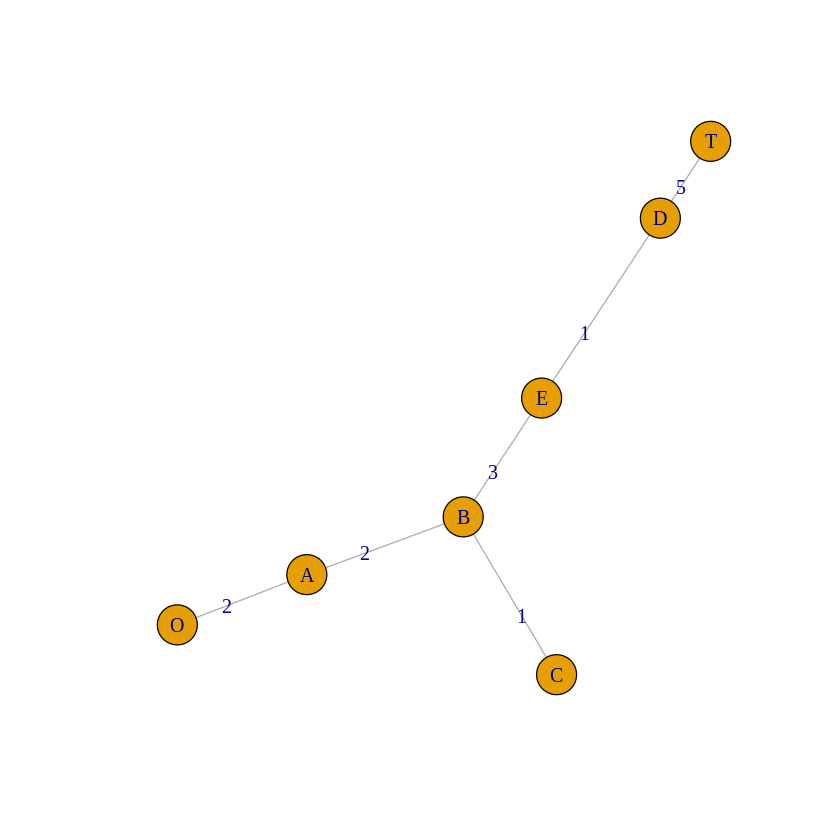

In [46]:
plot(g_mst, edge.label = E(g_mst)$weight)

In [48]:
sum(as.numeric(E(g_mst)$weight))

[1] 14

## Exercício

Encontre a árvore de expansão mínima na seguinte rede.

![](https://raw.githubusercontent.com/ctruciosm/ACA124/main/MST_ex.png)

(as ligações no gráfico são, na verdade, possíveis ligações e os números representam o cumprimento).